In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from get_results import read_df, get_performance_profiles

# Box Instance Results

In [2]:
df_s = read_df("../data/random_box_small.txt")
df_l = read_df("../data/random_box_large.txt")
df = pd.concat((df_s,df_l))
df.head()

,name,n,s,p,solver,strategy,recovered_coords,partitions,ratio,time_limit,objval,bound,gap,cuts,setup_time,solve_time,total_time
12749,dp_random_2,500,15,50,coordpar,all,499,499,1.0,30,231703.161713,231774.751608,0.000309,5489,6.95,30.009637,36.959637
12750,dp_random_2,500,15,50,coordpar,all,499,499,1.0,60,231703.161713,231731.816893,0.000124,5988,6.95,60.031284,66.981284
12751,dp_random_2,500,15,50,coordpar,all,499,499,1.0,120,231703.161713,231703.161713,0.000000,5988,6.95,67.903743,74.853743
12752,dp_random_2,500,15,50,coordpar,all,499,499,1.0,300,231703.161713,231703.161713,0.000000,5988,6.95,67.903743,74.853743
12753,dp_random_2,500,15,50,coordpar,all,499,499,1.0,600,231703.161713,231703.161713,0.000000,5988,6.95,67.903743,74.853743


In [3]:
savefig = False
fig_dir = "../fig"

# Plot Style Guide

In [4]:
CM = dict(zip(df['strategy'].unique(),[mpl.colormaps["tab10"](i) for i in range(len(df['strategy'].unique()))]))
LS = dict(zip(np.sort(df['ratio'].unique())[::-1],["-","--","-.",":","-","--"]))
MS = dict(zip(np.sort(df['ratio'].unique())[::-1],["o","^","D","x","P",""]))
LS[0] = "-"
MS[0] = ""

# Confirm Sizes

In [5]:
_df = df[df["time_limit"]==600]
tab = _df.pivot_table(index=["s","n"],columns=["solver","strategy","ratio"],values="solve_time",aggfunc="size")
tab

strategy  all greedy                random                stepped            \
ratio    1.00   0.10 0.25 0.50 0.75   0.10 0.25 0.50 0.75    0.10 0.25 0.50   
s  n                                                                          
2  100     10     10   10   10   10     10   10   10   10      10   10   10   
   250     10     10   10   10   10     10   10   10   10      10   10   10   
   500     10     10   10   10   10     10   10   10   10      10   10   10   
   1000    10     10   10   10   10     10   10   10   10      10   10   10   
5  100     10     10   10   10   10     10   10   10   10      10   10   10   
   250     10     10   10   10   10     10   10   10   10      10   10   10   
   500     10     10   10   10   10     10   10   10   10      10   10   10   
   1000    10     10   10   10   10     10   10   10   10      10   10   10   
10 100     10     10   10   10   10     10   10   10   10      10   10   10   
   250     10     10   10   10   10     10   10   10   10      10   10   10   
   500     10     10   10   10   10     10   10   10   10      10   10   10   
   1000    10     10   10   10   10     10   10   10   10      10   10   10   
15 100     10     10   10   10   10     10   10   10   10      10   10   10   
   250     10     10   10   10   10     10   10   10   10      10   10   10   
   500     10     10   10   10   10     10   10   10   10      10   10   10   
   1000    10     10   10   10   10     10   10   10   10      10   10   10   
20 100     10     10   10   10   10     10   10   10   10      10   10   10   
   250     10     10   10   10   10     10   10   10   10      10   10   10   
   500     10     10   10   10   10     10   10   10   10      10   10   10   
   1000    10     10   10   10   10     10   10   10   10      10   10   10   

strategy      stratified                  na  
ratio    0.75       0.10 0.25 0.50 0.75 0.00  
s  n                                          
2  100     10         10   10   10   10   10  
   250     10         10   10   10   10   10  
   500     10         10   10   10   10   10  
   1000    10         10   10   10   10   10  
5  100     10         10   10   10   10   10  
   250     10         10   10   10   10   10  
   500     10         10   10   10   10   10  
   1000    10         10   10   10   10   10  
10 100     10         10   10   10   10   10  
   250     10         10   10   10   10   10  
   500     10         10   10   10   10   10  
   1000    10         10   10   10   10   10  
15 100     10         10   10   10   10   10  
   250     10         10   10   10   10   10  
   500     10         10   10   10   10   10  
   1000    10         10   10   10   10   10  
20 100     10         10   10   10   10   10  
   250     10         10   10   10   10   10  
   500     10         10   10   10   10   10  
   1000    10         10   10   10   10   10

# Setup times

In [6]:
_df = df[df["time_limit"]==600]
tab = _df.pivot_table(index=["n"],columns=["ratio"],values="setup_time")
tab = tab.round(2)
tab

ratio,0.00,0.10,0.25,0.50,0.75,1.00
n,,,,,,
100,0.00,0.00,0.00,0.00,0.01,0.01
250,0.00,0.03,0.05,0.07,0.10,0.17
500,0.00,0.23,0.35,0.57,1.18,2.92
1000,0.01,1.96,3.19,5.42,9.26,16.66


In [7]:
_df = df[df["time_limit"]==600]
tab = _df.pivot_table(index=["n"],columns=["ratio"],values="setup_time")
tab = tab.round(2)
tab = tab.style.format('{:.2f}')
print(tab.to_latex(multirow_align="naive",convert_css=True))

\begin{tabular}{lrrrrrr}
ratio & 0.000000 & 0.100000 & 0.250000 & 0.500000 & 0.750000 & 1.000000 \\
n &  &  &  &  &  &  \\
100 & 0.00 & 0.00 & 0.00 & 0.00 & 0.01 & 0.01 \\
250 & 0.00 & 0.03 & 0.05 & 0.07 & 0.10 & 0.17 \\
500 & 0.00 & 0.23 & 0.35 & 0.57 & 1.18 & 2.92 \\
1000 & 0.01 & 1.96 & 3.19 & 5.42 & 9.26 & 16.66 \\
\end{tabular}



# All Tabular

In [8]:
_df = df[(df["time_limit"]==600)]
tab = _df.pivot_table(index=["s","n"],columns=["solver","strategy","ratio"],values="total_time")
tab = tab[[
            (      'ct',         'na',  0.0),
            ('coordpar',     'random',  0.1),
            ('coordpar',     'random', 0.25),
            ('coordpar',     'random',  0.5),
            ('coordpar',     'random', 0.75),
            ('coordpar',     'greedy',  0.1),
            ('coordpar',     'greedy', 0.25),
            ('coordpar',     'greedy',  0.5),
            ('coordpar',     'greedy', 0.75),
            ('coordpar',    'stepped',  0.1),
            ('coordpar',    'stepped', 0.25),
            ('coordpar',    'stepped',  0.5),
            ('coordpar',    'stepped', 0.75),
            ('coordpar', 'stratified',  0.1),
            ('coordpar', 'stratified', 0.25),
            ('coordpar', 'stratified',  0.5),
            ('coordpar', 'stratified', 0.75),
            ('coordpar', 'all', 1.0),
            ]]
tab = tab.round(2)
tab.style.background_gradient(cmap='Reds',axis=1)

In [9]:
def bold_ratio_min(x):
    r = [""]*len(x)
    mins= x.groupby(level=['solver', 'strategy']).idxmin()
    for i in range(len(x)):
        if x.index[i] in list(mins) and x.index[i][0]!="ct":
            r[i] = "font-weight: bold"
    return r
tabb = tab.style.apply(bold_ratio_min,axis=1)
tabb = tabb.format('{:.2f}')
print(tabb.to_latex(multirow_align="naive",convert_css=True))

\begin{tabular}{llrrrrrrrrrrrrrrrrrr}
 & solver & ct & \multicolumn{17}{r}{coordpar} \\
 & strategy & na & \multicolumn{4}{r}{random} & \multicolumn{4}{r}{greedy} & \multicolumn{4}{r}{stepped} & \multicolumn{4}{r}{stratified} & all \\
 & ratio & 0.000000 & 0.100000 & 0.250000 & 0.500000 & 0.750000 & 0.100000 & 0.250000 & 0.500000 & 0.750000 & 0.100000 & 0.250000 & 0.500000 & 0.750000 & 0.100000 & 0.250000 & 0.500000 & 0.750000 & 1.000000 \\
s & n &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
2 & 100 & 0.04 & \bfseries 0.04 & 0.08 & 0.13 & 0.19 & \bfseries 0.10 & 0.14 & 0.17 & 0.26 & \bfseries 0.03 & 0.05 & 0.07 & 0.10 & \bfseries 0.04 & 0.07 & 0.12 & 0.19 & \bfseries 0.18 \\
 & 250 & 0.12 & \bfseries 0.28 & 0.60 & 1.18 & 1.80 & \bfseries 0.69 & 1.56 & 1.86 & 2.62 & \bfseries 0.22 & 0.45 & 0.85 & 1.42 & \bfseries 0.28 & 0.64 & 1.15 & 1.86 & \bfseries 1.84 \\
 & 500 & 0.58 & \bfseries 2.43 & 4.63 & 8.96 & 14.49 & \bfseries 7.14 & 10.96 & 14.16 & 22.04 & \bfseries 1.99 & 4.70 &

So the greedy strategy is always bad.
For the other strategies, performance is all very similar.
However, the ratio is dependent on the number of coordinates.

# Ratios

Could i plot average difference in solve time?

Plot ave. solve time (600 time limit) vs. num coords, (excluding greedy).

/tmp/ipykernel_12325/4098983245.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  _df.loc[:,"cut_ratio"] = _df["cuts"]


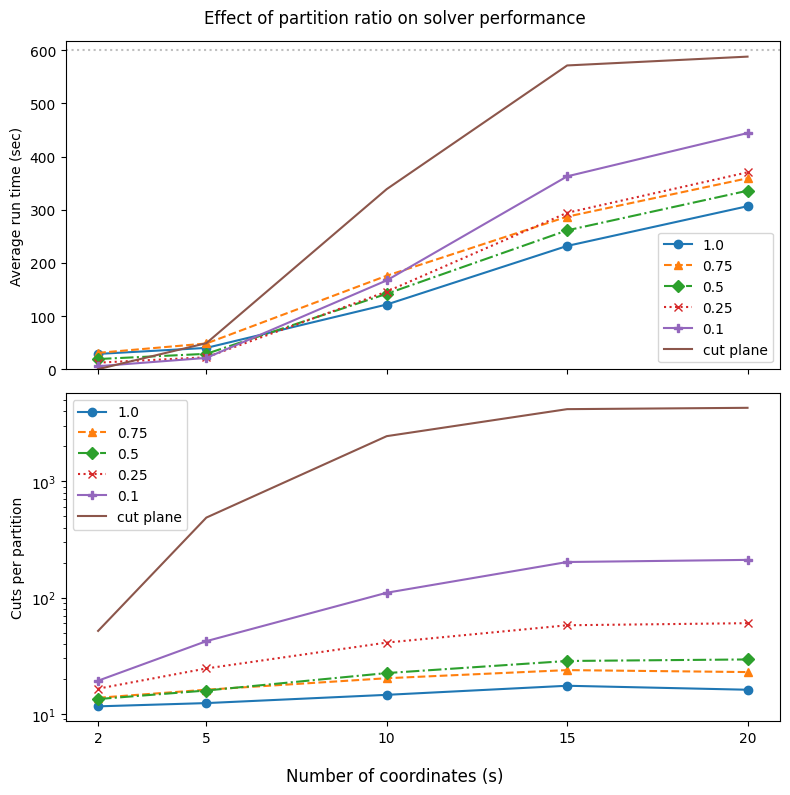

In [10]:
fig,axes=plt.subplots(2,figsize=(8,8),sharex=True)
_df = df[(df["time_limit"]==600)]
# Solve time
S = np.sort(df["s"].unique())
for r in _df["ratio"].unique():
    T = _df[(_df["ratio"]==r)].groupby("s")["total_time"].mean()
    if r == 0:
        axes[0].plot(S,T,ls=LS[r],marker=MS[r],label="cut plane")
    else:
        axes[0].plot(S,T,ls=LS[r],marker=MS[r],label=f"{r}")
axes[0].set_ylim(bottom=0)
axes[0].legend()
axes[0].set_ylabel("Average run time (sec)")
axes[0].axhline(y=600, color='grey', alpha=0.5, linestyle=':')
# Cuts per partition
_df.loc[:,"cut_ratio"] = _df["cuts"]
_df.loc[_df["solver"]=="coordpar","cut_ratio"] /= _df.loc[_df["solver"]=="coordpar","partitions"]
S = np.sort(df["s"].unique())
for r in _df["ratio"].unique():
    T = _df[(_df["ratio"]==r)].groupby("s")["cut_ratio"].mean()
    if r == 0:
        axes[1].plot(S,T,ls=LS[r],marker=MS[r],label="cut plane")
    else:
        axes[1].plot(S,T,ls=LS[r],marker=MS[r],label=f"{r}")
axes[1].legend()
axes[1].set_xticks(S)
axes[1].set_yscale("log")
axes[1].set_ylabel("Cuts per partition")
fig.supxlabel("Number of coordinates (s)")
fig.suptitle("Effect of partition ratio on solver performance")
fig.tight_layout()
if savefig: 
    plt.savefig(f"{fig_dir}/ratios.pdf")
plt.show()

So we can ignore ratios <=0.1, they are only *marginally* better at $s=2,5$ and then worse thereafter.
However, larger ratios are comparable with cutting plane at low ratios, but get far better as $s$ increases.

# Performance Profiles

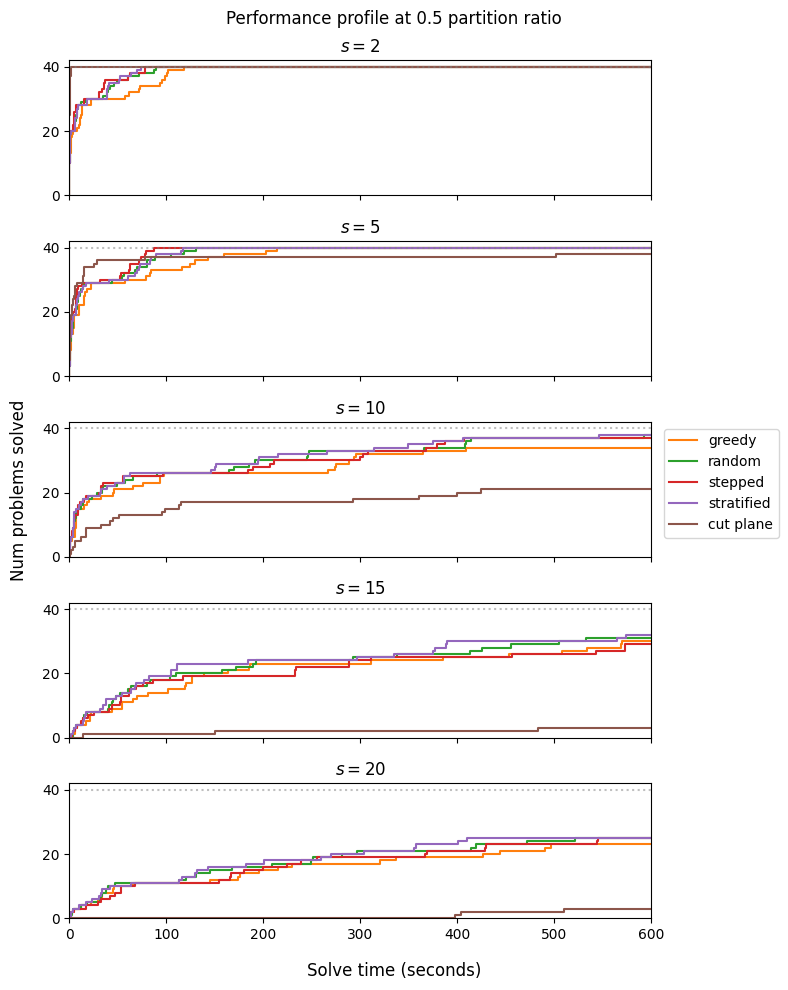

In [11]:
S = np.sort(df["s"].unique())
fig,axes = plt.subplots(len(S),figsize=(8,10),sharex=True,sharey=True)
_df = df[(df["time_limit"]==600)&((df["ratio"]==0.5)|(df["ratio"]==0))]
for s in range(len(S)):
    __df = _df[_df["s"]==S[s]]
    pp = get_performance_profiles(__df)
    for sv,st,r in sorted(list(pp.keys())):
        axes[s].step(pp[sv,st,r][0],pp[sv,st,r][1],
            where="post",color=CM[st],#ls=LS[r],marker=MS[r],
            label=f"{st}" if st!="na" else "cut plane"
            )
    axes[s].axhline(y=40, color='grey', alpha=0.5, linestyle=':')
    axes[s].set_xlim(0,600)
    axes[s].set_ylim(bottom=0)
    axes[s].set_title(f"$s={S[s]}$")
fig.supylabel("Num problems solved")
fig.supxlabel("Solve time (seconds)")
fig.suptitle("Performance profile at 0.5 partition ratio")
axes[2].legend(bbox_to_anchor=(1.01,1))
plt.tight_layout()
if savefig: 
    plt.savefig(f"{fig_dir}/pp.pdf")
plt.show()

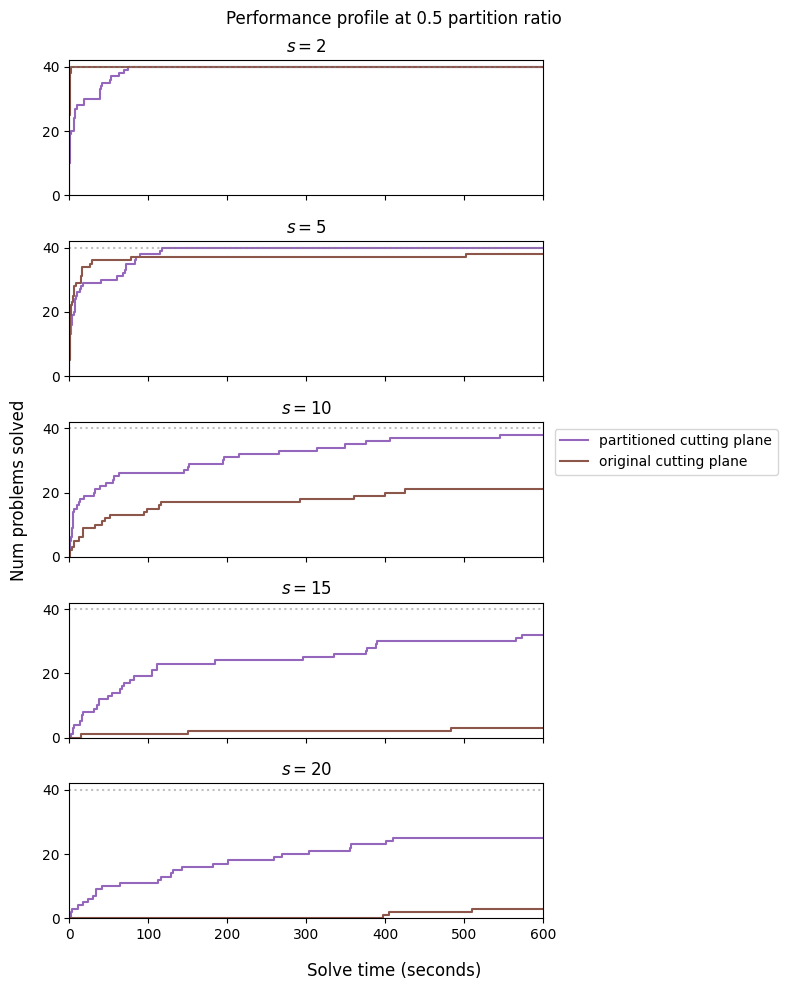

In [12]:
savefig=True
S = np.sort(df["s"].unique())
fig,axes = plt.subplots(len(S),figsize=(8,10),sharex=True,sharey=True)
_df = df[(df["time_limit"]==600)&((df["ratio"]==0.5)|(df["ratio"]==0))]
for s in range(len(S)):
    __df = _df[_df["s"]==S[s]]
    pp = get_performance_profiles(__df)
    for sv,st,r in sorted(list(pp.keys())):
        if st=="na":
            name = "original cutting plane"
        elif st == "stratified":
            name = "partitioned cutting plane"
        else:
            continue
        axes[s].step(pp[sv,st,r][0],pp[sv,st,r][1],
            where="post",color=CM[st],#ls=LS[r],marker=MS[r],
            label=name
            )
    axes[s].axhline(y=40, color='grey', alpha=0.5, linestyle=':')
    axes[s].set_xlim(0,600)
    axes[s].set_ylim(bottom=0)
    axes[s].set_title(f"$s={S[s]}$")
fig.supylabel("Num problems solved")
fig.supxlabel("Solve time (seconds)")
fig.suptitle("Performance profile at 0.5 partition ratio")
axes[2].legend(bbox_to_anchor=(1.01,1))
plt.tight_layout()
if savefig: 
    plt.savefig(f"{fig_dir}/pp-simplifed.pdf")
plt.show()